In [1]:
from IPython.display import display, HTML
display(HTML('<h1>KMeans Here the problem states to find clusters of group having same category </h1>'))


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [85]:
df = pd.read_csv("K cluster income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Salary')

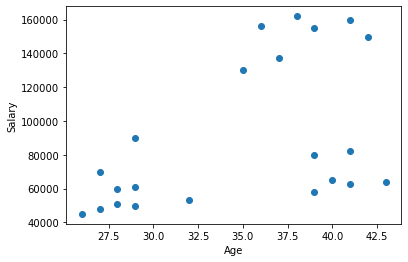

In [10]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Salary')

In [15]:
from IPython.display import display, HTML
display(HTML('<h1>Here looking at the pic, we need to give n_cluster number </br> We can see that  3 clusters can be made</h1>'))


In [86]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])   # == input given -> Age, Income 
y_predicted   # == gotthe ouput from Age and Income

# It predicted 3 groups and thus named as 0, 1, 2 
# Thus as of now, these numeric bianaries are not named yet !!!

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [87]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


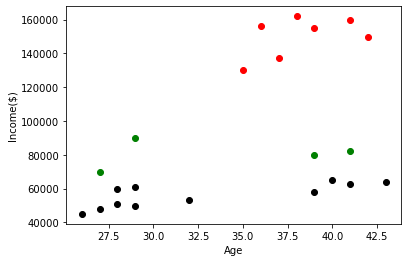

In [88]:
df1 = df[df['cluster'] ==0]
df2 = df[df['cluster'] ==1]
df3 = df[df['cluster'] ==2]
plt.scatter(df1.Age,df1['Income($)'], color ='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
# plt.legend()

# WE can see df1 (green) cluster is fine but not df2 or df3 cluster , as they both are scattered indifferently
# because y_axis is not good as compared with x_axis , not scattered properly

In [34]:
from IPython.display import display, HTML
display(HTML('<h1>Using scaler we can get the values between range of 0 to 1 so that it can scale properly on plot </h1>'))


In [90]:
# Preprocessing using min max scaler    -> to get the cluster group right 

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df    #all ranges between 0-1  ie in binary value

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [41]:
 # Now again we do prediction using min max scaler for Age and Salary column
#  by making them converted into Binary

km =  KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])   
y_predicted

df['cluster']=y_predicted
df.head()



,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [44]:
from IPython.display import display, HTML
display(HTML('<h1>Now we can see our clusters are distributed proportionately </h1>'))
km.cluster_centers_  # we got the centers of each CLUSTER 

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

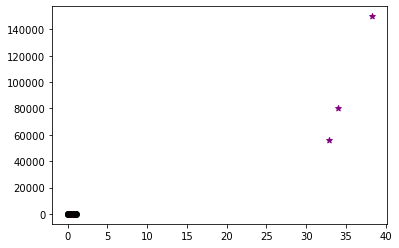

In [91]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#              see above this is first column and first row taken to mark the clusters 
# plt.legend()

In [45]:
from IPython.display import display, HTML
display(HTML('<h1>In real life, putting clusters will be difficult so we use elbow plot method </h1>'))


In [46]:
#                      Elbow Plot

# The elbow method runs k-means clustering on the dataset for a range of 
# values for k (say from 1-10) and then for each value of k 
# computes an average score for all clusters.

# SSE 

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)             # sum of squre errors == km.inertia_

C:\Users\tushar.m\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


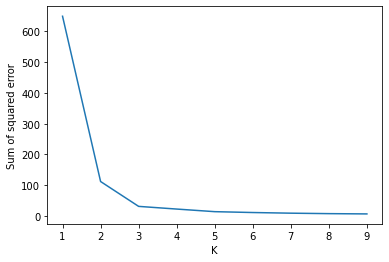

In [92]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [50]:
from IPython.display import display, HTML
display(HTML('<h1>Lets find Elbow plot  on Iris Dataset using KMeans </h1>'))


In [51]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [62]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target_names
# iris.target
# dir(iris)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [70]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)   # INPUT GIVEN 
df.head()

# Based on this data , we find k which is == target ! 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
df['flower'] = iris.target
df.head()
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [76]:
km = KMeans(n_clusters=3)
y_p = km.fit_predict(df)
y_p                          # == OUTPUT from df predicted  

df['cluster'] = y_p          # Let store this output in column named cluster
df.head()
df[df.cluster==2]

,petal length (cm),petal width (cm),cluster
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1
55,4.5,1.3,1
56,4.7,1.6,1
57,3.3,1.0,1
58,4.6,1.3,1
59,3.9,1.4,1


In [96]:
# For all 3 clusters or 3 categories , Lets plot them to see the difference
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

,Name,Age,Income($),cluster
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
11,Tom,0.000000,0.000000,2
12,Arnold,0.058824,0.025641,2
13,Jared,0.117647,0.051282,2
14,Stark,0.176471,0.038462,2
15,Ranbir,0.352941,0.068376,2
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2


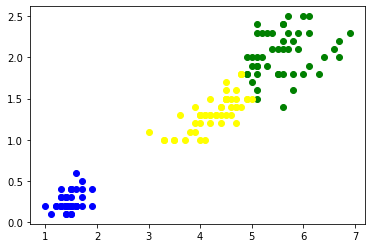

In [79]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [81]:
# Elbow Plot

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

C:\Users\tushar.m\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


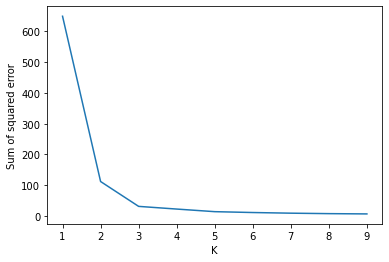

In [82]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)